In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
data = pd.read_csv('testing_data.csv')

In [2]:
data_good = data.dropna()

Impute the cells

In [3]:
data

,Video Title,Savgol and Color Extraction,HeartPy,CNN,Capture,Body,Actual,Time CNN,Time HeartPy,Time Savgol
0,Attempt1.mp4,63.44,NaN,65.250,Bad,Resting,56,0.201234,0.004634,0.000229
1,Attempt2.mp4,76.15,112.50,66.040,Bad,Resting,63,0.168582,0.004562,0.000287
2,Attempt3.mp4,76.15,NaN,59.950,Bad,Resting,60,0.207128,NaN,0.000403
3,Attempt4.mp4,110.20,65.45,65.750,Very Good,Resting,65,0.196034,0.005799,0.000246
4,Attempt7.mp4,93.09,68.99,62.500,Good,Resting,84,0.168069,0.005823,0.000332
5,Attempt8.mp4,99.60,103.28,63.290,Good,Exercise,102,0.221452,0.006672,0.000463
6,Attempt9.mp4,85.38,92.31,70.090,Good,Resting,82,0.204475,0.005982,0.000444
7,Attempt10.mp4,78.97,72.15,64.140,Very Good,Resting,77,0.205332,0.006111,0.000318
8,Attempt11.mp4,77.97,70.65,68.250,Very Good,Resting,78,0.060506,0.005540,0.000464
9,Attempt12.mp4,94.79,65.25,63.480,Good,Resting,72,0.059840,0.003572,0.000268


In [4]:
data = data.fillna(0)

In [5]:
# Calculate metrics for each method
methods = ['Savgol and Color Extraction', 'HeartPy', 'CNN']

for method in methods:
    actual = data['Actual']
    predicted = data[method]
    
    mae = mean_absolute_error(actual, predicted)
    rmse = mean_squared_error(actual, predicted, squared=False)  # RMSE
    r2 = r2_score(actual, predicted)
    
    print(f"{method} Metrics:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R-squared (R2): {r2}\n")


Savgol and Color Extraction Metrics:
MAE: 14.95
RMSE: 21.70558591699381
R-squared (R2): -1.6164980870810086

HeartPy Metrics:
MAE: 19.93933333333333
RMSE: 31.803218600219278
R-squared (R2): -4.617195549686527

CNN Metrics:
MAE: 12.629733333333336
RMSE: 17.66177468621618
R-squared (R2): -0.7323916211679911



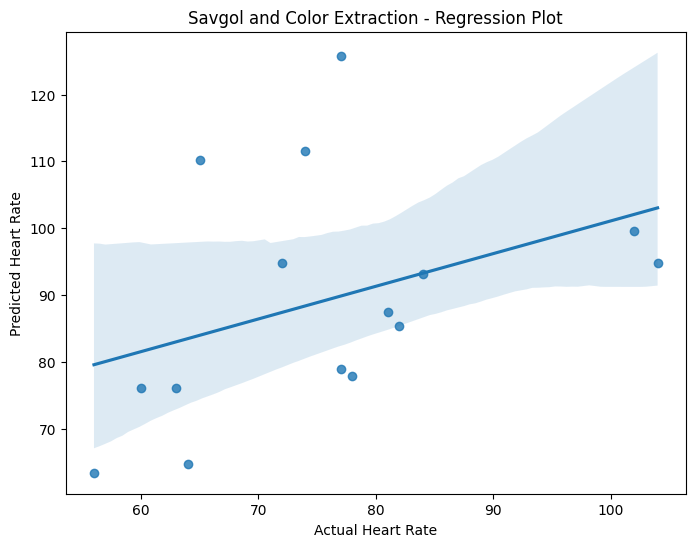

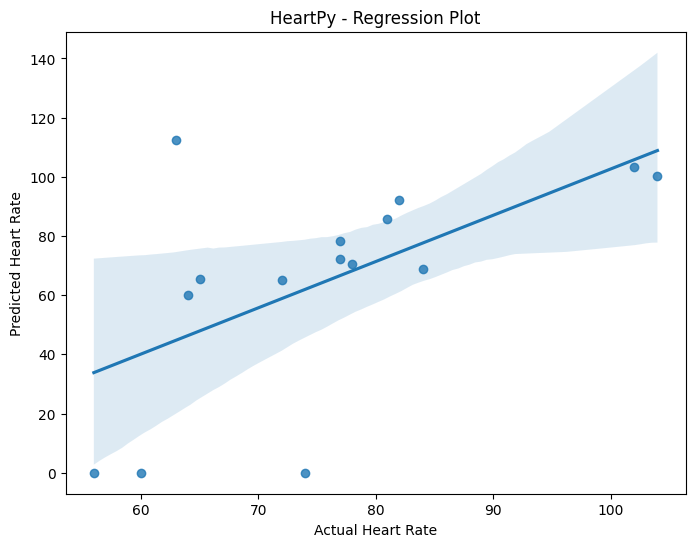

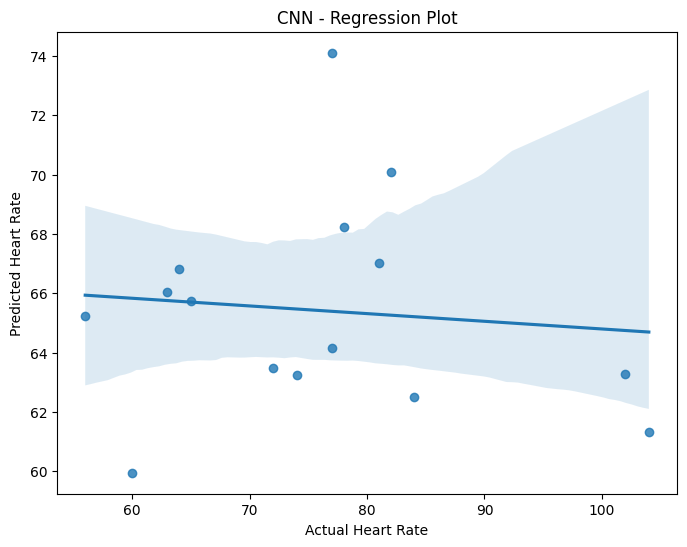

In [6]:
for method in methods:
    actual = data['Actual']
    predicted = data[method]

    # Regression plot
    plt.figure(figsize=(8, 6))
    sns.regplot(x=actual, y=predicted)
    plt.title(f"{method} - Regression Plot")
    plt.xlabel("Actual Heart Rate")
    plt.ylabel("Predicted Heart Rate")
    plt.show()


<Figure size 1200x600 with 0 Axes>

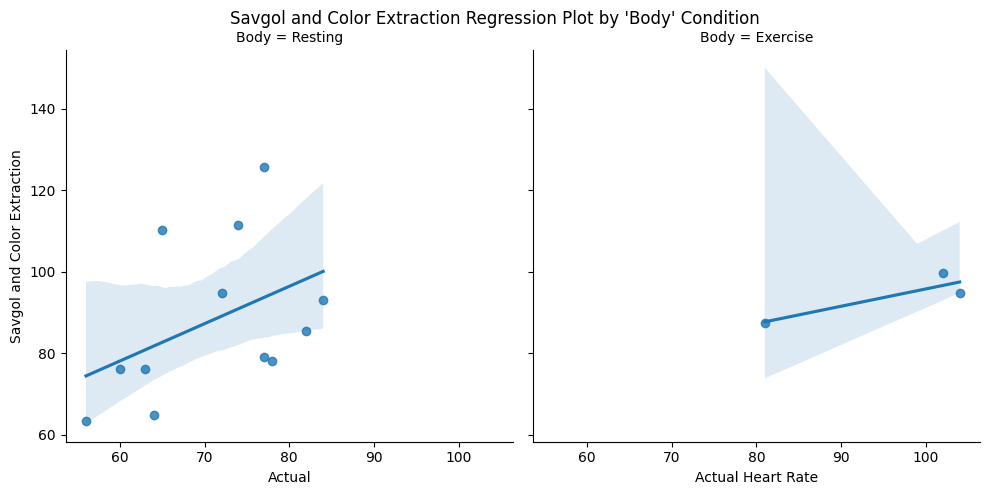

<Figure size 1200x600 with 0 Axes>

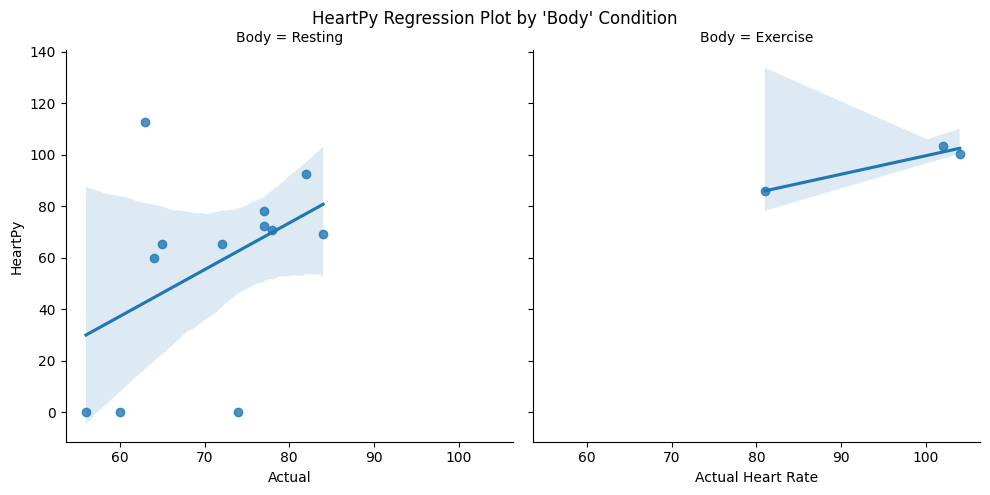

<Figure size 1200x600 with 0 Axes>

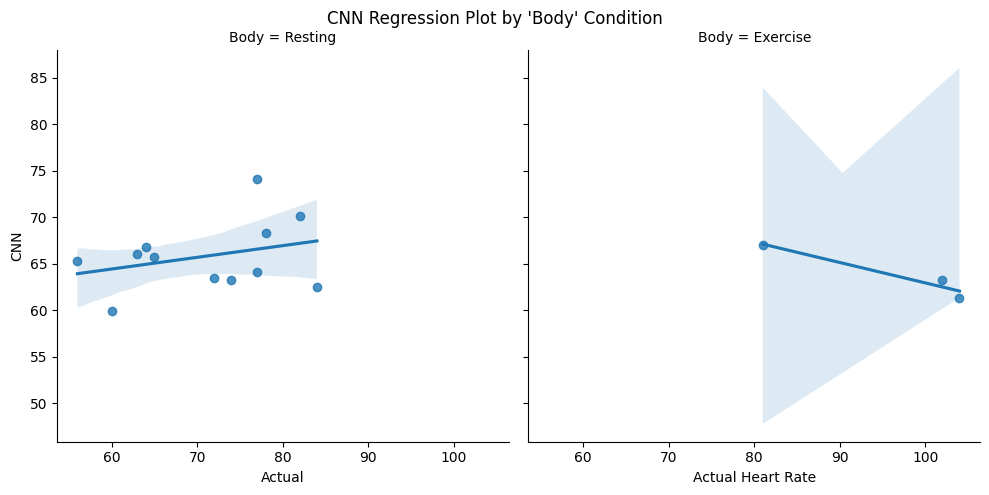

In [7]:
# Regression plot by 'Body' condition
for method in methods:
    plt.figure(figsize=(12, 6))
    sns.lmplot(x='Actual', y=method, col='Body', data=data)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(f"{method} Regression Plot by 'Body' Condition")
    plt.xlabel("Actual Heart Rate")
    plt.ylabel("Predicted Heart Rate")
    plt.show()

<Figure size 1200x600 with 0 Axes>

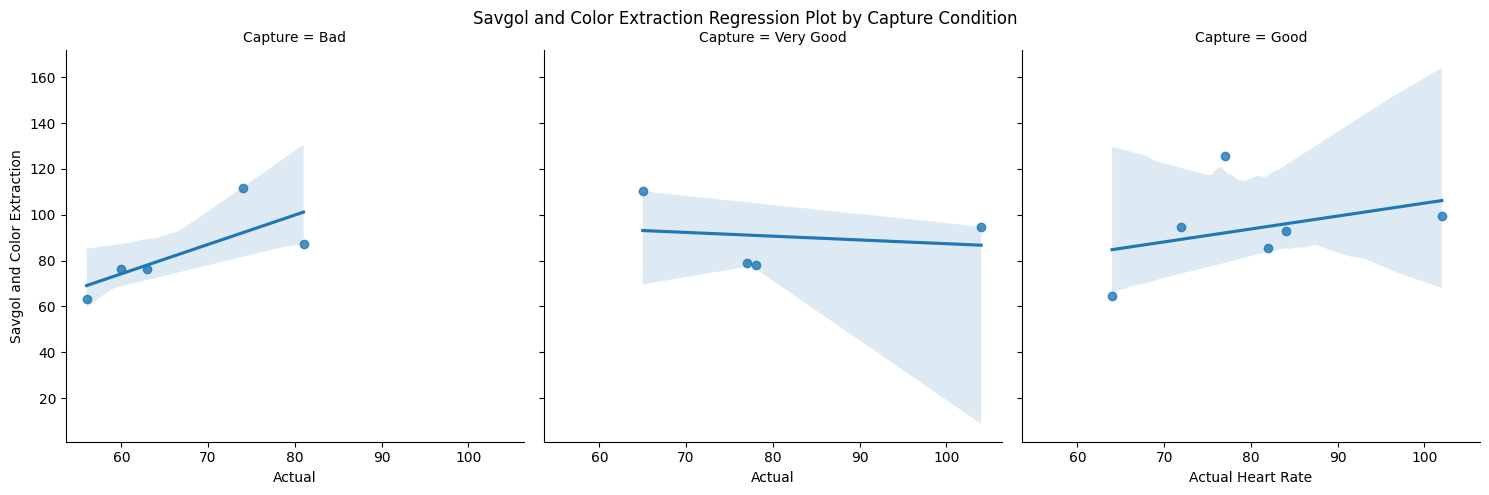

<Figure size 1200x600 with 0 Axes>

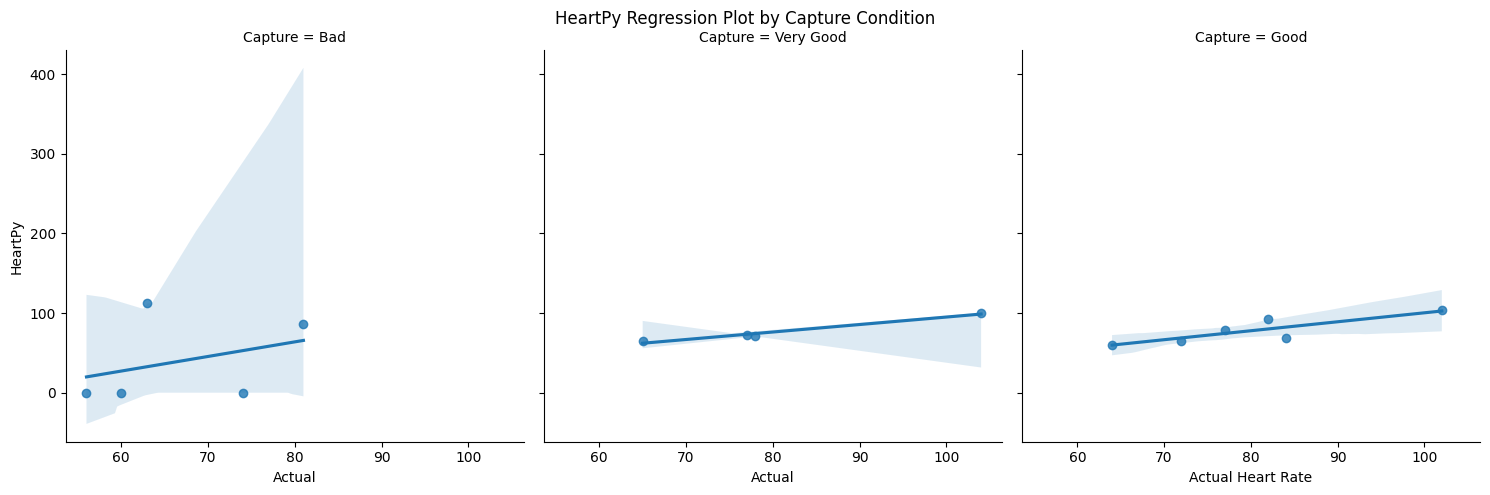

<Figure size 1200x600 with 0 Axes>

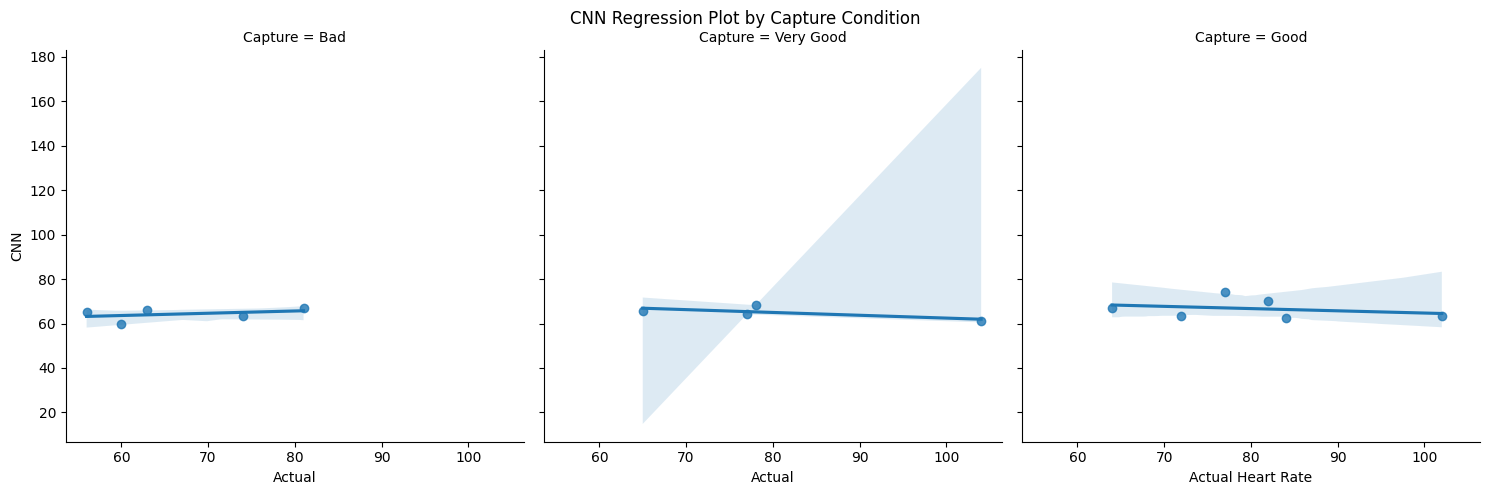

In [8]:
# Regression plot by 'Capture' condition
for method in methods:
    plt.figure(figsize=(12, 6))
    sns.lmplot(x='Actual', y=method, col='Capture', data=data)
    plt.subplots_adjust(top=0.9)
    plt.suptitle(f"{method} Regression Plot by Capture Condition")
    plt.xlabel("Actual Heart Rate")
    plt.ylabel("Predicted Heart Rate")
    plt.show()

In [9]:
times = ['Time Savgol ', 'Time HeartPy', 'Time CNN']
# ['Savgol and Color Extraction', 'HeartPy', 'CNN']

In [10]:
data.columns

Index(['Video Title', 'Savgol and Color Extraction', 'HeartPy', 'CNN',
       'Capture', 'Body', 'Actual', 'Time CNN', 'Time HeartPy',
       'Time Savgol '],
      dtype='object')